<a href="https://colab.research.google.com/github/samharsh02/Soft-Computing/blob/Fuzzy-Logic-Controller/FuzzyLogicController.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=6c32e8f830b2330f722f815c4c959781b510096972c396bcd3e89d16c97f994e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
dirt = ctrl.Antecedent(np.arange(0, 101, 1), 'dirt')
grease = ctrl.Antecedent(np.arange(0, 51, 1), 'grease')

# Output variable
wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')


# Triangular membership functions for input variables
dirt['VSD'] = fuzz.trimf(dirt.universe, [0, 0, 25])
dirt['SD'] = fuzz.trimf(dirt.universe, [0, 25, 50])
dirt['MD'] = fuzz.trimf(dirt.universe, [25, 50, 75])
dirt['HD'] = fuzz.trimf(dirt.universe, [50, 75, 100])
dirt['VHD'] = fuzz.trimf(dirt.universe, [75, 100, 100])

grease['SG'] = fuzz.trimf(grease.universe, [0, 0, 25])
grease['MG'] = fuzz.trimf(grease.universe, [0, 25, 50])
grease['HG'] = fuzz.trimf(grease.universe, [25, 50, 50])

# Triangular membership functions for output variable
wash_time['VST'] = fuzz.trimf(wash_time.universe, [0, 0, 15])
wash_time['ST'] = fuzz.trimf(wash_time.universe, [0, 15, 30])
wash_time['MT'] = fuzz.trimf(wash_time.universe, [15, 30, 45])
wash_time['HT'] = fuzz.trimf(wash_time.universe, [30, 45, 60])
wash_time['VHT'] = fuzz.trimf(wash_time.universe, [45, 60, 60])

In [ ]:
#view the membership functions of the input variables
dirt.view()
grease.view()

In [ ]:
# Rule base
rule1 = ctrl.Rule(antecedent=((dirt['VSD'] & grease['SG']) |
                              (dirt['SD'] & grease['SG']) |
                              (dirt['VSD'] & grease['MG'])),
                  consequent=wash_time['VST'])

rule2 = ctrl.Rule(antecedent=((dirt['VSD'] & grease['HG']) |
                              (dirt['SD'] & grease['MG']) |
                              (dirt['MD'] & grease['SG'])),
                  consequent=wash_time['ST'])

rule3 = ctrl.Rule(antecedent=((dirt['SD'] & grease['HG']) |
                              (dirt['MD'] & grease['MG']) |
                              (dirt['HD'] & grease['SG'])),
                  consequent=wash_time['MT'])

rule4 = ctrl.Rule(antecedent=((dirt['MD'] & grease['HG']) |
                              (dirt['HD'] & grease['MG']) |
                              (dirt['VHD'] & grease['SG'])),
                  consequent=wash_time['HT'])

rule5 = ctrl.Rule(antecedent=((dirt['HD'] & grease['HG']) |
                              (dirt['VHD'] & grease['MG']) |
                              (dirt['VHD'] & grease['HG'])),
                  consequent=wash_time['VHT'])



Enter dirt value (0 to 100): 55
Enter grease value (0 to 50): 30
Wash Time: 34.05084745762714


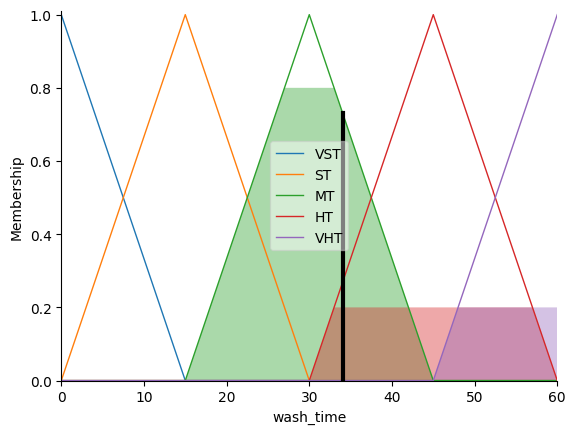

In [ ]:
# Fuzzy system
washing_machine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
washing_machine = ctrl.ControlSystemSimulation(washing_machine_ctrl)

# User input
user_dirt = float(input("Enter dirt value (0 to 100): "))
user_grease = float(input("Enter grease value (0 to 50): "))

# Check input validity
user_dirt = max(0, min(100, user_dirt))
user_grease = max(0, min(50, user_grease))

# Set user input values
washing_machine.input['dirt'] = user_dirt
washing_machine.input['grease'] = user_grease

# Compute the result
washing_machine.compute()

# Print the result
print("Wash Time:", washing_machine.output['wash_time'])
wash_time.view(sim=washing_machine)